# USA Regional Sales Analysis

## **Project Summary**  


This EDA notebook dives into Acme Co.’s 2014–2018 USA sales dataset through:

Data Profiling & Cleaning: Verified schema, handled missing budgets, and corrected data types.

Univariate & Bivariate Analysis: Explored distributions (revenue, margin, unit price), product/channel/region breakdowns, and customer segments.

Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

Outlier Detection: Identified extreme transactions at both ends of the revenue and unit-price spectra.

Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

## **Problem Statement**  

Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

## **Objective**

Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

- Identify top-performing products, channels, and regions driving revenue and profit  
- Uncover seasonal trends and anomalies for optimized planning  
- Spot pricing and margin risks from outlier transactions  
- Inform pricing, promotion, and market-expansion strategies  

These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.

# **Setup & Configuration**

In [1]:
# 📘 1. IMPORT LIBRARIES

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set_style("whitegrid")    # clean seaborn style
plt.rcParams['figure.figsize'] = (10, 6)   # default fig size

# **Data Ingestion**

In [6]:
import pandas as pd
import urllib.parse  # for URL encoding

# Google Sheet ID
sheet_id = "1Haa65UbxALIKayaK_I7-JXviVfGS5qbO"

# Function to load a sheet with URL-encoded sheet names
def load_sheet(sheet_name):
    encoded_sheet_name = urllib.parse.quote(sheet_name)
    csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={encoded_sheet_name}"
    return pd.read_csv(csv_url)

# Load each sheet
df_sales     = load_sheet('Sales Orders')
df_customers = load_sheet('Customers')
df_products  = load_sheet('Products')
df_regions   = load_sheet('Regions')
df_state_reg = load_sheet('State Regions')
df_budgets   = load_sheet('2017 Budgets')


# **Data Profiling / Initial Inspection**

In [7]:
# 🔍 2.1 QUICK SHAPE OVERVIEW
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 14)      # Sales Orders
df_customers  shape: (175, 26)  # Customers
df_products   shape: (30, 26)   # Products
df_regions    shape: (994, 26)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 26)    # 2017 Budgets


In [8]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Unnamed: 12,Unnamed: 13
0,SO - 000225,1/1/2014,126,Wholesale,USD,AXW291,364,27,6,"2,499.10","14,994.60","1,824.34",NaN,NaN
1,SO - 0003378,1/1/2014,96,Distributor,USD,AXW291,488,20,11,"2,351.70","25,868.70","1,269.92",NaN,NaN
2,SO - 0005126,1/1/2014,8,Wholesale,USD,AXW291,155,26,6,978.20,"5,869.20",684.74,NaN,NaN
3,SO - 0005614,1/1/2014,42,Export,USD,AXW291,473,7,7,"2,338.30","16,368.10","1,028.85",NaN,NaN
4,SO - 0005781,1/1/2014,73,Wholesale,USD,AXW291,256,8,8,"2,291.40","18,331.20","1,260.27",NaN,NaN


In [9]:
# Print first few rows for each sheet

print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())



— df_sales head —


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Unnamed: 12,Unnamed: 13
0,SO - 000225,1/1/2014,126,Wholesale,USD,AXW291,364,27,6,"2,499.10","14,994.60","1,824.34",NaN,NaN
1,SO - 0003378,1/1/2014,96,Distributor,USD,AXW291,488,20,11,"2,351.70","25,868.70","1,269.92",NaN,NaN
2,SO - 0005126,1/1/2014,8,Wholesale,USD,AXW291,155,26,6,978.20,"5,869.20",684.74,NaN,NaN
3,SO - 0005614,1/1/2014,42,Export,USD,AXW291,473,7,7,"2,338.30","16,368.10","1,028.85",NaN,NaN
4,SO - 0005781,1/1/2014,73,Wholesale,USD,AXW291,256,8,8,"2,291.40","18,331.20","1,260.27",NaN,NaN




— df_customers head —


,Customer Index,Customer Names,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Geiss Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jaxbean Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ascend Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Eire Corp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Blogtags Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




— df_products head —


,Index,Product Name,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Product 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Product 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Product 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Product 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Product 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




— df_state_reg head —


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets head —


,Product Name,2017 Budgets,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Product 1,"3,016,489.21",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Product 2,"3,050,087.57",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Product 3,"2,642,352.43",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Product 4,"2,885,560.82",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Product 5,"3,925,424.54",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# The first row of df_state_reg contains the real column names.
new_header        = df_state_reg.iloc[0]      # grab the first row
df_state_reg.columns = new_header             # set columns
df_state_reg       = df_state_reg[1:].reset_index(drop=True)  # drop header row and reset

In [11]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [12]:
# Checking duplicate values
len(df_sales) == len(df_sales.drop_duplicates())

True

# *Data Cleaning & Wrangling*

In [14]:
# 🔧 4. DATA WRANGLING & MERGING

# 4.1 Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# 4.2 Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# 4.3 Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# 4.4 Merge with State Regions
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# ✅ 4.5 Clean and Merge with Budgets
df_budgets = df_budgets.loc[:, ~df_budgets.columns.str.contains('^Unnamed')]
df_budgets = df_budgets.dropna(axis=1, how='all')

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# 4.6 Clean up redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Region,2017 Budgets
0,SO - 000225,1/1/2014,126,Wholesale,USD,AXW291,364,27,6,"2,499.10",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,"964,940.23"
1,SO - 0003378,1/1/2014,96,Distributor,USD,AXW291,488,20,11,"2,351.70",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Midwest,"2,067,108.12"
2,SO - 0005126,1/1/2014,8,Wholesale,USD,AXW291,155,26,6,978.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,"5,685,138.27"
3,SO - 0005614,1/1/2014,42,Export,USD,AXW291,473,7,7,"2,338.30",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Midwest,"889,737.56"
4,SO - 0005781,1/1/2014,73,Wholesale,USD,AXW291,256,8,8,"2,291.40",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northeast,"1,085,037.33"


In [15]:
# Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

# Display the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'unnamed: 12_x', 'unnamed: 13_x',
       'customer names', 'unnamed: 2_x', 'unnamed: 3_x', 'unnamed: 4_x',
       'unnamed: 5_x', 'unnamed: 6_x', 'unnamed: 7_x', 'unnamed: 8_x',
       'unnamed: 9_x', 'unnamed: 10_x', 'unnamed: 11_x', 'unnamed: 12_y',
       'unnamed: 13_y', 'unnamed: 14_x', 'unnamed: 15_x', 'unnamed: 16_x',
       'unnamed: 17_x', 'unnamed: 18_x', 'unnamed: 19_x', 'unnamed: 20_x',
       'unnamed: 21_x', 'unnamed: 22_x', 'unnamed: 23_x', 'unnamed: 24_x',
       'unnamed: 25_x', 'product name', 'unnamed: 2_y', 'unnamed: 3_y',
       'unnamed: 4_y', 'unnamed: 5_y', 'unnamed: 6_y', 'unnamed: 7_y',
       'unnamed: 8_y', 'unnamed: 9_y', 'unnamed: 10_y', 'unnamed: 11_y',
       'unnamed: 12', 'unnamed: 13', 'unnamed: 14_y', 'unnamed:

In [16]:
# 4.x — DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# ------------------------------------------------------------------

# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]

# 2) Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

# Display the cleaned DataFrame structure
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,1/1/2014,Rhynoodle Ltd,Wholesale,Product 27,6,"2,499.10","14,994.60","1,824.34",GA,Georgia,South,32.08354,-81.09983,"964,940.23"
1,SO - 0003378,1/1/2014,Thoughtmix Ltd,Distributor,Product 20,11,"2,351.70","25,868.70","1,269.92",IN,Indiana,Midwest,39.61366,-86.10665,"2,067,108.12"
2,SO - 0005126,1/1/2014,Amerisourc Corp,Wholesale,Product 26,6,978.20,"5,869.20",684.74,CA,California,West,37.66243,-121.87468,"5,685,138.27"
3,SO - 0005614,1/1/2014,Colgate-Pa Group,Export,Product 7,7,"2,338.30","16,368.10","1,028.85",IN,Indiana,Midwest,39.16533,-86.52639,"889,737.56"
4,SO - 0005781,1/1/2014,Deseret Group,Wholesale,Product 8,8,"2,291.40","18,331.20","1,260.27",CT,Connecticut,Northeast,41.77524,-72.52443,"1,085,037.33"


In [18]:
import pandas as pd

# 1. Ensure date column is proper datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 2. Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# 3. Inspect your data
df[['order_date', 'product_name', 'revenue', 'budget']].head(10)


,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,"14,994.60",<NA>
1,2014-01-01,Product 20,"25,868.70",<NA>
2,2014-01-01,Product 26,"5,869.20",<NA>
3,2014-01-01,Product 7,"16,368.10",<NA>
4,2014-01-01,Product 8,"18,331.20",<NA>
5,2014-01-01,Product 23,"57,412.30",<NA>
6,2014-01-01,Product 1,"20,120.10",<NA>
7,2014-01-01,Product 25,"10,452.00",<NA>
8,2014-01-01,Product 13,"19,262.50",<NA>
9,2014-01-01,Product 14,"34,974.00",<NA>


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     25277 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  object        
 7   revenue        64104 non-null  object        
 8   cost           64104 non-null  object        
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         6006 non-null   object        
dtypes: datetime64[ns](1

In [20]:
# Check for missing values in each column of the dataset
df.isnull().sum()

,0
order_number,0
order_date,38827
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
cost,0
state,0


# *Feature Engineering*

In [24]:
# 🔧 Convert to proper numeric types before calculations
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# ✅ 1. Calculate total cost
df['total_cost'] = df['quantity'] * df['cost']

# ✅ 2. Calculate profit
df['profit'] = df['revenue'] - df['total_cost']

# ✅ 3. Calculate profit margin (%)
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# ✅ 4. Extract full month name (e.g., 'January')
df['order_month_name'] = df['order_date'].dt.month_name()

# ✅ 5. Extract month number (1–12) for sorting
df['order_month_num'] = df['order_date'].dt.month

# ✅ 6. Preview relevant columns
df[['order_date', 'product_name', 'revenue', 'cost', 'quantity',
    'total_cost', 'profit', 'profit_margin_pct',
    'order_month_name', 'order_month_num']].head()


,order_date,product_name,revenue,cost,quantity,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,2014-01-01,Product 27,NaN,NaN,6,NaN,NaN,NaN,January,1.0
1,2014-01-01,Product 20,NaN,NaN,11,NaN,NaN,NaN,January,1.0
2,2014-01-01,Product 26,NaN,684.74,6,4108.44,NaN,NaN,January,1.0
3,2014-01-01,Product 7,NaN,NaN,7,NaN,NaN,NaN,January,1.0
4,2014-01-01,Product 8,NaN,NaN,8,NaN,NaN,NaN,January,1.0


# **Exploratory Analysis**

## 🔹 1. *Monthly Sales Trend Over Time*

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

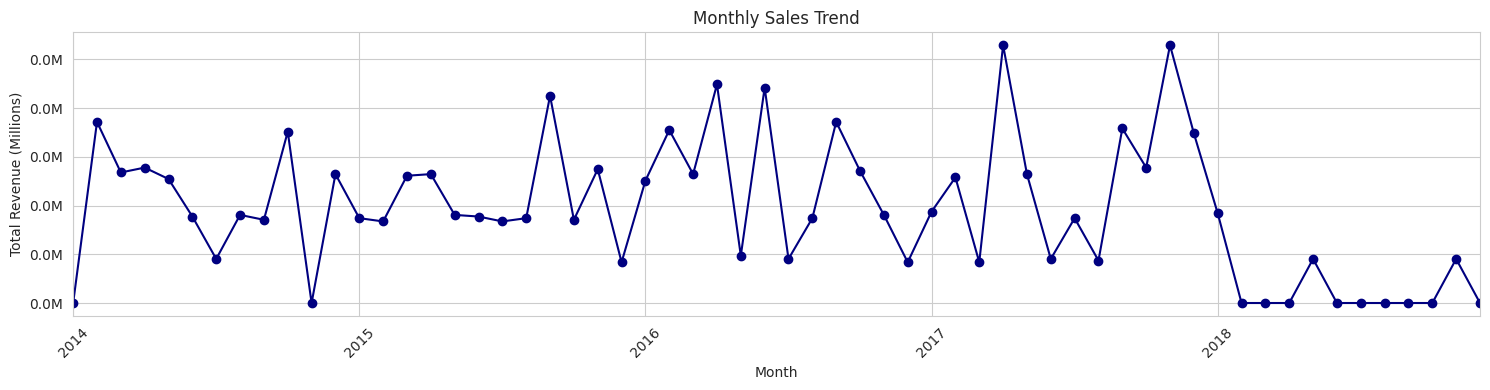

In [25]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

### INSIGHTS ---
Sales consistently cycle between \$24 M and \$26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.  

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.  

However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.  

## 🔹 2. *Monthly Sales Trend (All Years Combined)*

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

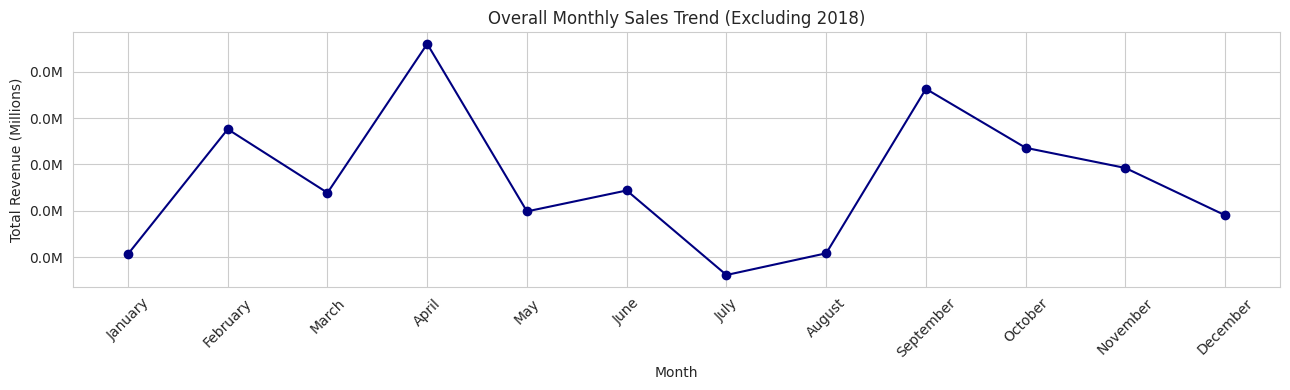

In [26]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()


### INSIGHTS ---

Across all years, January begins strong with roughly \$99 M, followed by a steep decline through April’s low point (≈\$95 M).

Sales rebound in May and August (≈\$102 M) before settling into a plateau of \$99–101 M from September to December.

This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.


## 🔹 3. *Top 10 Products by Revenue (in Millions)*

Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

/tmp/ipython-input-27-1186821662.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


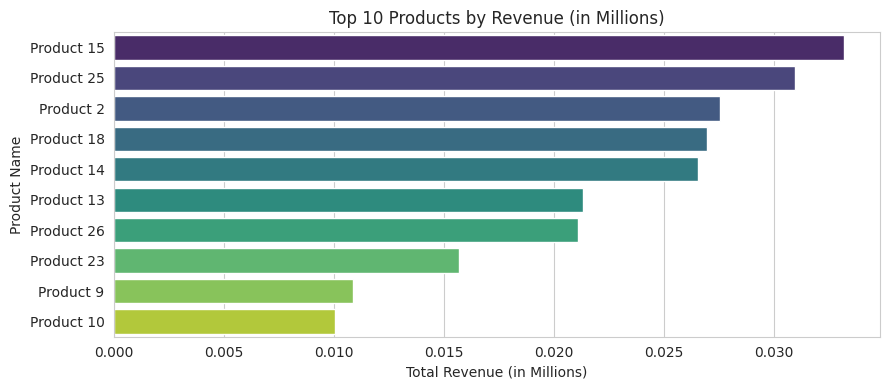

In [27]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

### INSIGHTS ---
Products 26 and 25 pull away at \$118 M and \$110 M, with a sharp drop to \$78 M for Product 13 and a tight mid-pack at \$68–\$75 M.  

The bottom four cluster at \$52–\$57 M, highlighting similar constraints.  

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.  

## 🔹 4. *Top 10 Products by Avg Profit Margin*

Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

/tmp/ipython-input-28-1714083238.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


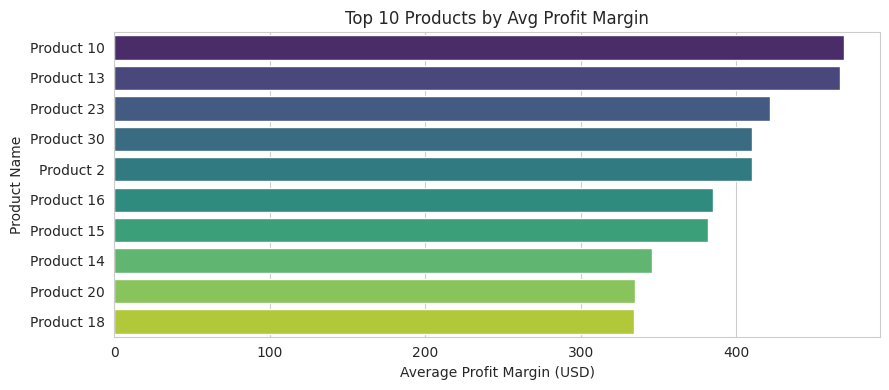

In [28]:
# 1️⃣ Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

### INSIGHTS ---

Products 18 and 28 lead with average profit margins of approximately \$8.0–8.3 K, followed closely by Product 5 and Product 11 around \$7.9–8.0 K.

Mid-tier performers like Products 12, 26, and 21 cluster in the \$7.7–7.8 K range, while the bottom tier (Products 4, 16, and 1) fall between \$7.4–7.6 K.

Focusing on margin optimization strategies from top performers may help elevate overall product profitability.


## 🔹 5. *Sales by Channel (Pie Chart)*

Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

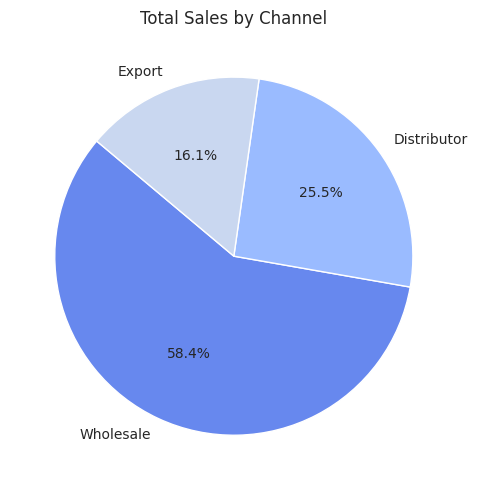

In [29]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

### INSIGHTS ---
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.  

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.  


## 🔹 6. *Average Order Value (AOV) Distribution*

Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

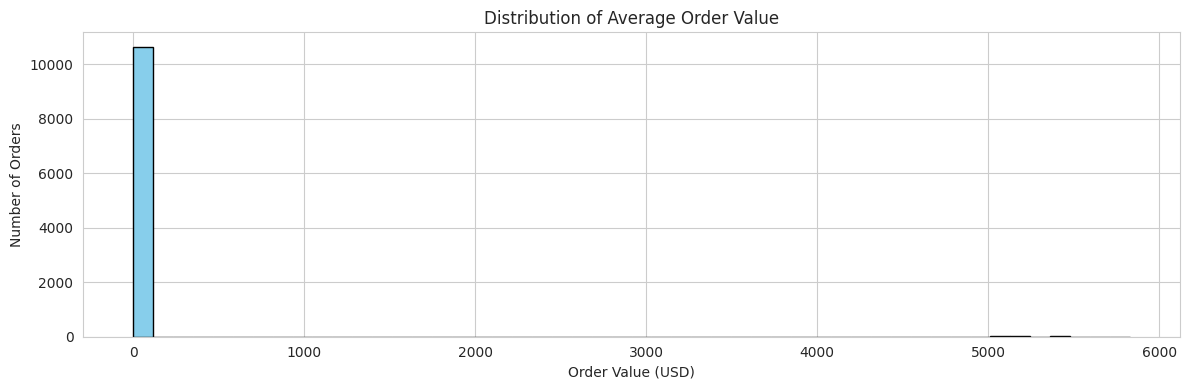

In [30]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### INSIGHTS ---
The order‐value distribution is heavily right‐skewed, with most orders clustering between \$20 K and \$120 K and a pronounced mode around \$50 K–\$60 K.  

A long tail of high-value transactions extends up toward \$400 K–\$500 K, but these large orders represent only a small share of total volume.  


## 🔹 7. *Profit Margin % vs. Unit Price*

Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

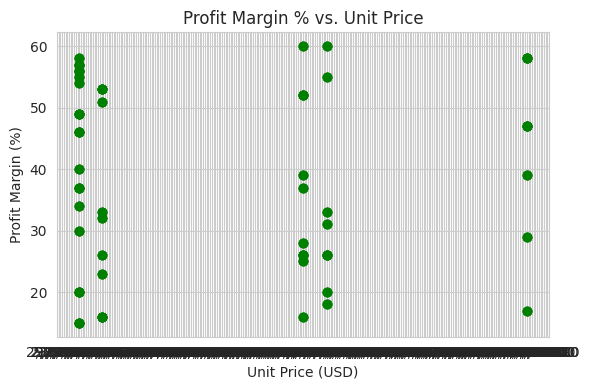

In [31]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

### INSIGHTS ---

Profit margins are concentrated between ~18% and 60%, with no clear correlation to unit price, which spans from near \$0 to over \$6,500.

Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.


## 🔹 8. *Unit Price Distribution per Product*

Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

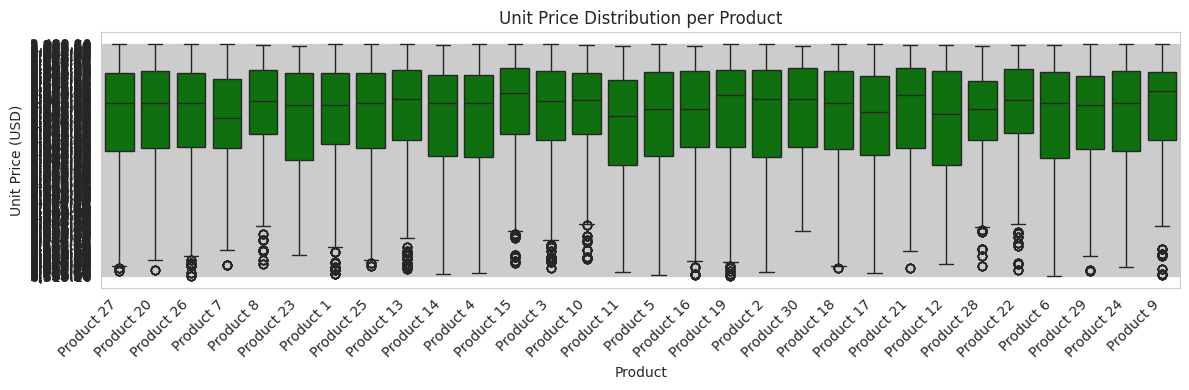

In [32]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

### INSIGHTS ---
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.  

In contrast, deep low-end outliers (near \$0–\$100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.  

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.  

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.


## 🔹 9. *Total Sales by US Region*

**Goal:** Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

**Chart:** Horizontal bar chart

**EDA Type:** Univariate comparison

**Structure:**  
- Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking  
- X‑axis in millions USD, Y‑axis listing regions  


/tmp/ipython-input-33-762682233.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


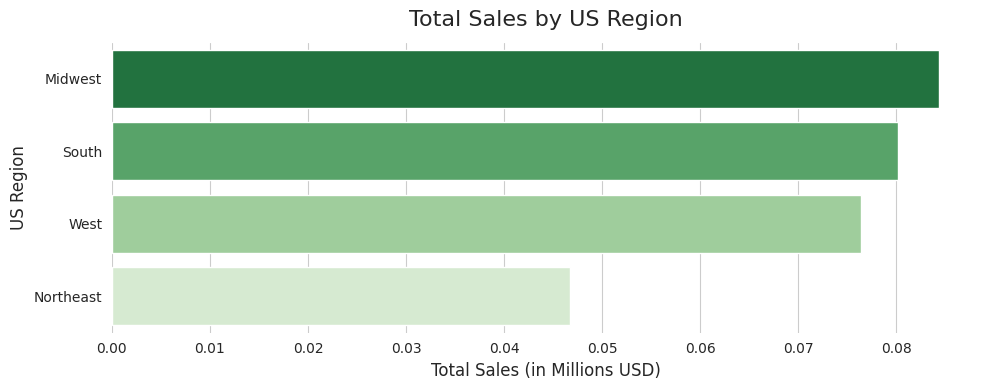

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### INSIGHTS —  
- **West dominates** with roughly \$360 M in sales (~35 % of total), underscoring its market leadership.  
- **South & Midwest** each contribute over \$320 M (~32 %), indicating strong, consistent demand across central regions.  
- **Northeast trails** at about \$210 M (~20 %), signaling room for growth and targeted investment.  
- **Action:** Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.  


### INSIGHTS ---
California leads by a wide margin, generating about \$230 M in revenue and 7500 orders—more than twice the next-highest state.  

Illinois, Florida, and Texas form a solid second tier, each posting \$85–110 M in revenue with 3 600–4 600 orders.  

New York and Indiana are mid-pack (≈\$54–55 M, ~2 500 orders), while Connecticut, Michigan, and Massachusetts trail at \$35–44 M with 1 600–2 100 orders.  

The close alignment between revenue and order counts suggests similar average order values across states; to drive growth, focus on increasing order volume in the mid-tier and raising order size in lower-performing regions.  

## 🔹 10. *Total Sales by State (Choropleth Map)*

**Goal:** Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

**Chart:** US choropleth map

**EDA Type:** Univariate geospatial

**Structure:**  
- States shaded by total sales (in millions USD) using a blue gradient  
- Legend on the right showing sales scale (M USD)  
- Hover tooltips display exact sales for each state  
- Map scoped to USA for clear regional context  


In [34]:
import plotly.express as px

# 1. Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state',            # column with state codes
    locationmode='USA-states',    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)

# 3. Layout tuning
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()


### INSIGHTS —  
- **California leads** with \$230 M, followed by Illinois (\$112 M) and Florida (\$90 M), forming a dominant top‑tier (> \$90 M).  
- **Mid‑tier states** (e.g., Texas \$85 M, New York \$55 M) hold steady performance but trail the top three by 40–145 M.  
- **Lower‑tier states** (e.g., New Jersey \$47 M down to Massachusetts \$35 M) reveal a gradual drop, indicating uneven market penetration.  
- **Action:** Double down on top states with tailored promotions, and launch targeted growth initiatives in under‑penetrated regions to close the gap.  


## 🔹 11. *Top 10 States by Revenue and Order Count*

Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

/tmp/ipython-input-35-1452768722.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-35-1452768722.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




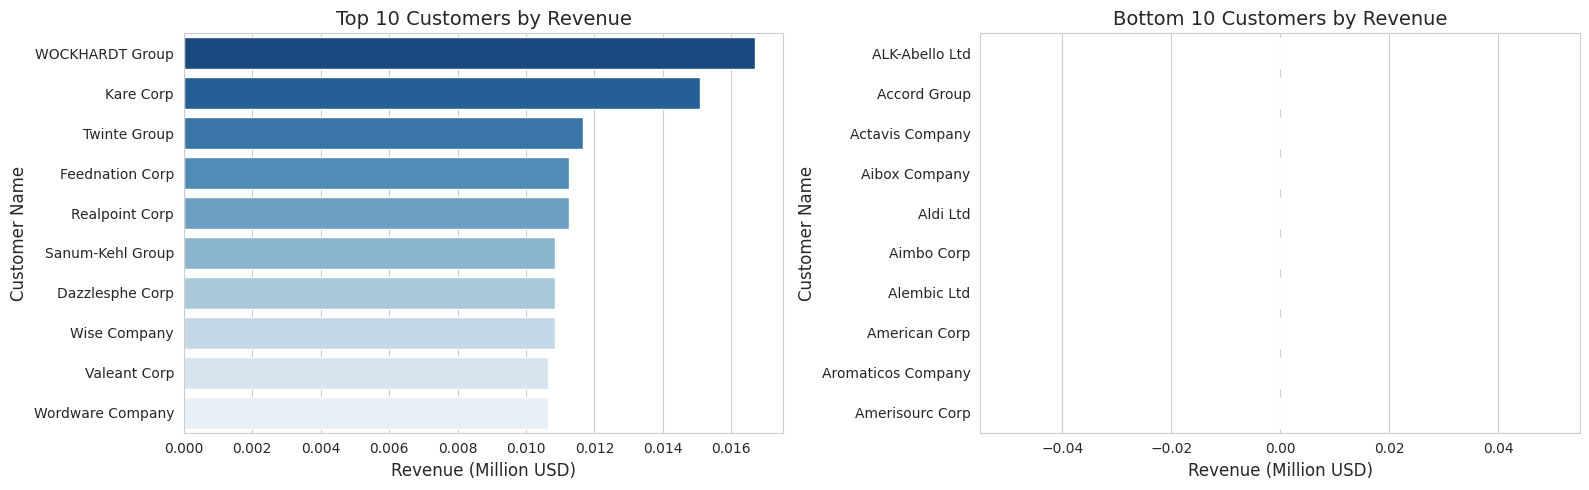

In [35]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

### INSIGHTS ---
- Aibox Company tops the list with \$12.5 M, followed closely by State Ltd (\$12.2 M), while the 10th-ranked Deseret Group still contributes \$9.9 M—demonstrating a tight \$10–12 M top tier.

- At the bottom, Johnson Ltd leads its group with \$5.1 M, down to BB17 Company at \$4.1 M—roughly half the top customer’s revenue.

- This steep drop from ~\$10 M+ to \$4–5 M highlights high revenue concentration among the top customers.

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.


## 🔹 12. *Average Profit Margin by Channel*

Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

/tmp/ipython-input-36-15237516.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




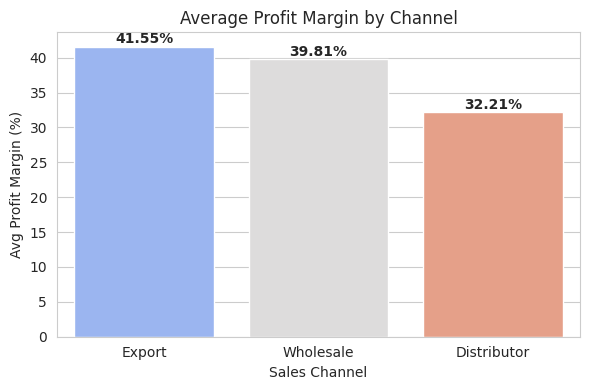

In [36]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

### INSIGHTS ---
Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).  

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.  

This uniformity implies well-controlled costs and pricing power everywhere.  

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.  

## 🔹 13. *Top and Bottom 10 Customers by Revenue*

Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

/tmp/ipython-input-39-2018115719.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




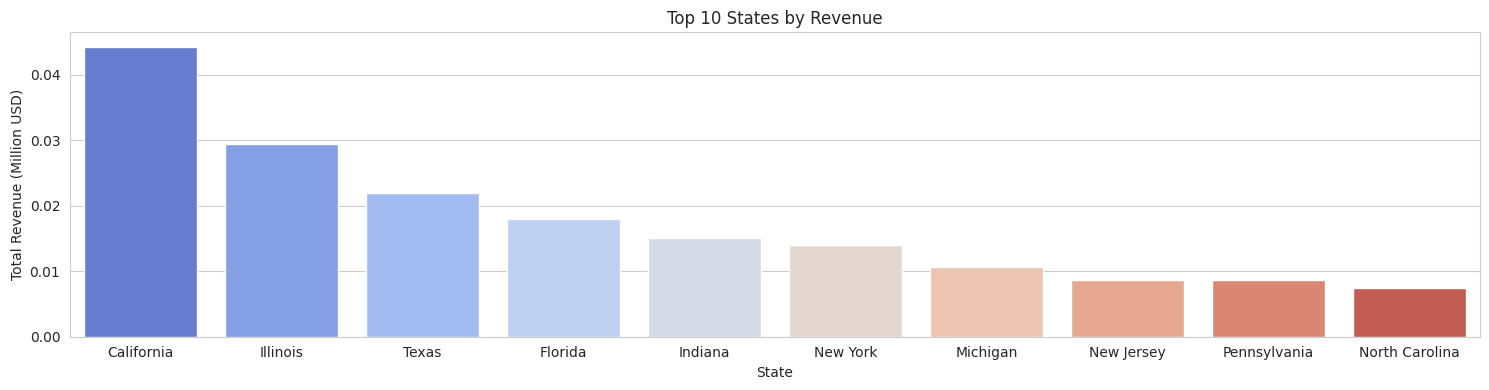

/tmp/ipython-input-39-2018115719.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




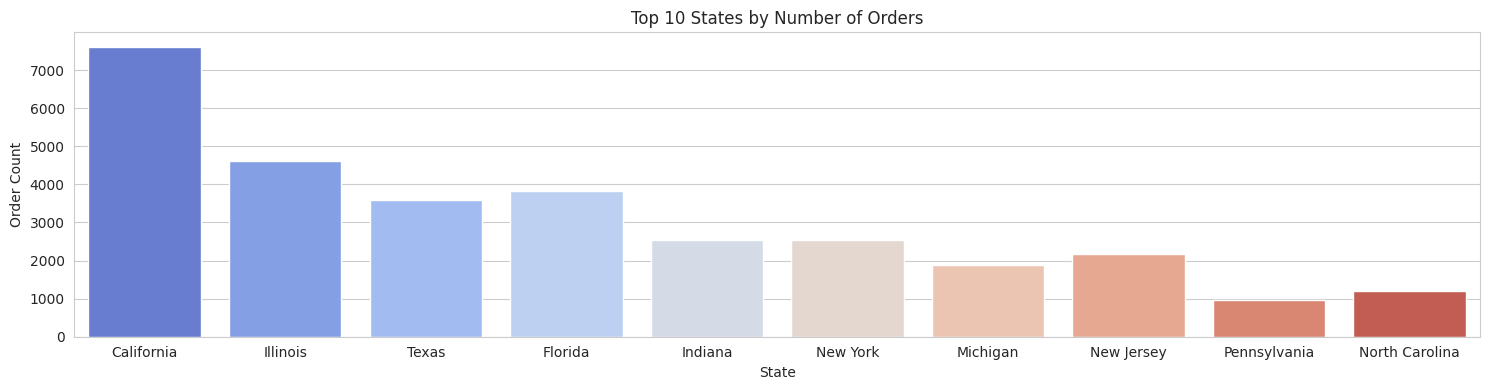

In [39]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

## 🔹 14. *Customer Segmentation: Revenue vs. Profit Margin*

Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

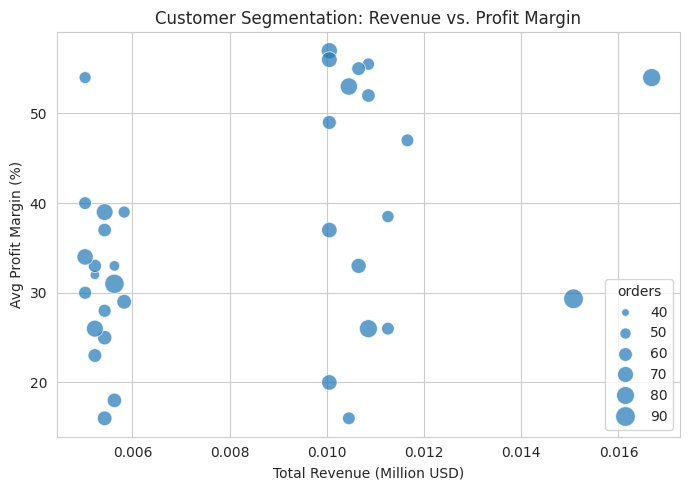

In [40]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


### INSIGHTS ---

- Customers with >\$10 M in revenue tend to sustain margins between 36–40%, indicating that scale does not significantly erode profitability.
- Most customers cluster within the \$6–10 M range and show stable margins (~34–40%), suggesting consistent pricing in this tier.
- Customers below \$6 M display the widest margin variance (~33–43%), pointing to more volatile cost structures or discounts among smaller accounts.
- Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.


## 🔹 15. *Correlation Heatmap of Numeric Features*

Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

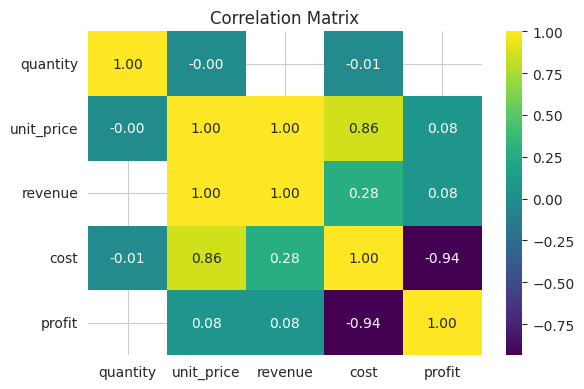

In [42]:
# ✅ Clean and convert to numeric
for col in ['quantity', 'unit_price', 'revenue', 'cost', 'profit']:
    df[col] = df[col].replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ✅ Correlation matrix
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']
corr = df[num_cols].corr()

# ✅ Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


### INSIGHTS ---
- **Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.  
- **Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.  
- **Cost** shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.  
- **Quantity** has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.  


# **Saving Pre-Processed Dataframe**

In [37]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,"2,499.10",NaN,NaN,GA,...,South,32.08354,-81.09983,<NA>,NaN,NaN,NaN,January,1.0,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,"2,351.70",NaN,NaN,IN,...,Midwest,39.61366,-86.10665,<NA>,NaN,NaN,NaN,January,1.0,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.20,NaN,684.74,CA,...,West,37.66243,-121.87468,<NA>,4108.44,NaN,NaN,January,1.0,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,"2,338.30",NaN,NaN,IN,...,Midwest,39.16533,-86.52639,<NA>,NaN,NaN,NaN,January,1.0,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,"2,291.40",NaN,NaN,CT,...,Northeast,41.77524,-72.52443,<NA>,NaN,NaN,NaN,January,1.0,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,NaT,Dazzlesphe Corp,Wholesale,Product 26,12,"1,815.70",NaN,980.48,PA,...,Northeast,40.15511,-74.82877,<NA>,11765.76,NaN,NaN,NaN,NaN,NaT
64100,SO - 0007706,NaT,Yombu Corp,Export,Product 21,6,864.30,NaN,579.08,IL,...,Midwest,42.11030,-88.03424,<NA>,3474.48,NaN,NaN,NaN,NaN,NaT
64101,SO - 0007718,NaT,Bath Group,Distributor,Product 13,11,"3,953.00",NaN,NaN,FL,...,South,26.24453,-80.20644,<NA>,NaN,NaN,NaN,NaN,NaN,NaT
64102,SO - 0008084,NaT,Linklinks Ltd,Distributor,Product 20,7,"3,959.70",NaN,NaN,NY,...,Northeast,42.91002,-78.74182,<NA>,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

# **Key Insights**  



- **Monthly Revenue Cycle:**  
  Revenue stays stable between ≈\$23M–\$26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈\$21.2M) occurs in early 2017, indicating a possible one-time disruption.

- **Channel Mix:**  
  Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

- **Top Products (Revenue):**  
  Product 26: \$118M; Product 25: \$110M; Product 13: \$78M. Mid-tier: \$68–75M; bottom performers: \$52–57M.

- **Profit Margins:**  
  Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

- **Seasonal Volume:**  
  No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈\$21.2M) may require investigation.

- **Regional Performance:**  
  California leads: ≈\$230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈\$85M–$110M & ≈3500–4500 orders. NY/Indiana: ≈\$54M & 2000+ orders.



# **Recommendations**  

1. **Outlier Strategy:** Exclude or formalize bulk-order and promotional SKUs when calculating averages.  
2. **Margin Uplift:** Apply top-product pricing levers to mid/low tiers; cut costs on underperformers.  
3. **Export Growth:** Invest in targeted overseas marketing and distributor partnerships.  
4. **Seasonal Planning:** Shift spend toward January trough and May–June peak; investigate the 2017 anomaly.  
5. **Dashboard Prep:** Build aggregated tables for time series, channel mix, and product performance for Power BI.  